# BCSD Infographic notebook
This notebook provides various processing and infographics on COVID dashboard reporting for Berkeley County School District

## Data imported and added to dataframe

In [1]:

import csv
import pprint as pp
from datetime import datetime, date, time

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets as my_widgets

with open('./output/data.csv', 'r') as fp:
    df = pd.read_csv(fp, parse_dates=['Date','DateTime'], infer_datetime_format=True)

    # Drop any duplicate data entries
    cleaned_df = df.replace('Mt Holly Elementary', 'Mount Holly Elementary')
    cleaned_df = cleaned_df.drop_duplicates(['School','Date'], keep='last')
    

## List all schools and areas the district is tracking

In [2]:
print(f"The school district is tracking {len(cleaned_df.School.unique())} schools, offices or departments.")
print(f"Here is the full list.")
pp.pprint(list(cleaned_df.School.unique()), compact=True, width=120)

The school district is tracking 84 schools, offices or departments.
Here is the full list.
['Berkeley County School District', 'Mount Holly Elementary', 'Academic Services', 'Administrative Services',
 'Adult Education - Hanahan', 'Adult Education - Moncks Corner', 'Berkeley Alternative', 'Berkeley Elementary',
 'Berkeley High School', 'Berkeley Intermediate', 'Berkeley Middle', 'Berkeley Middle College', 'Board of Education',
 'Bonner Elementary', 'Boulder Bluff Elementary', 'Bowens Corner Elementary', 'Cainhoy Elementary',
 'Cane Bay Elementary', 'Cane Bay High', 'Cane Bay Middle', 'Capital Improvements', 'Career Technical Ed', 'CDEP',
 'Child Nutrition', 'College Park Elementary', 'College Park Middle', 'Communications / Public Relations',
 'Cross Elementary', 'Cross High', 'Daniel Island School', 'Dist Office Transportation', 'Evaluation & Leadership',
 'Financial Services', 'First Steps', 'Foxbank Elementary', 'Goose Creek Elementary', 'Goose Creek High',
 'Hanahan Elementary', 'H

## Top 5 Highest Schools Today

###  By Student Count

In [3]:
most_recent_date = cleaned_df.Date.max().date()
if most_recent_date != date.today():
    print(f"Data is not available for today: {date.today()}")
    print(f"Most recent date with data is {most_recent_date}")
cases_today = cleaned_df[cleaned_df.Date >= datetime.combine(most_recent_date,time())]
highest_student_cnt = cases_today.sort_values(by=["Student Count"], ascending=False)
highest_student_cnt[highest_student_cnt.School!='Berkeley County School District'].head()

Data is not available for today: 2021-09-07
Most recent date with data is 2021-09-03


,School,Area,Date,Staff Count,Student Count,DateTime
582,Stratford High,Goose Creek,2021-09-03,6,116,2021-09-03 04:35:34
545,Berkeley Middle,Moncks Corner,2021-09-03,7,104,2021-09-03 04:35:34
553,Cane Bay Middle,Summerville,2021-09-03,2,88,2021-09-03 04:35:34
552,Cane Bay High,Summerville,2021-09-03,5,71,2021-09-03 04:35:34
578,Sangaree Middle,Ladson,2021-09-03,1,54,2021-09-03 04:35:34


### By Staff Count

In [4]:
highest_staff_cnt = cases_today.sort_values(by=["Staff Count"], ascending=False)
highest_staff_cnt[highest_staff_cnt.School!='Berkeley County School District'].head()

,School,Area,Date,Staff Count,Student Count,DateTime
577,Sangaree Elementary,Summerville,2021-09-03,10,48,2021-09-03 04:35:34
545,Berkeley Middle,Moncks Corner,2021-09-03,7,104,2021-09-03 04:35:34
548,Bonner Elementary,Moncks Corner,2021-09-03,7,38,2021-09-03 04:35:34
587,Whitesville Elementary,Moncks Corner,2021-09-03,7,49,2021-09-03 04:35:34
571,Mount Holly Elementary,Goose Creek,2021-09-03,6,48,2021-09-03 04:35:34


## Top 5 Highest Schools All Time

###  By Student Count

In [5]:
all_time_students = cleaned_df.sort_values(by=["Student Count","School"], ascending=False).drop_duplicates(["School"], keep='first')
all_time_students[all_time_students.School!='Berkeley County School District'].head()

,School,Area,Date,Staff Count,Student Count,DateTime
582,Stratford High,Goose Creek,2021-09-03,6,116,2021-09-03 04:35:34
545,Berkeley Middle,Moncks Corner,2021-09-03,7,104,2021-09-03 04:35:34
553,Cane Bay Middle,Summerville,2021-09-03,2,88,2021-09-03 04:35:34
439,Berkeley High School,Moncks Corner,2021-09-01,2,78,2021-09-01 03:27:59
500,Cane Bay High,Summerville,2021-09-02,4,77,2021-09-02 03:50:34


### By Staff Count

In [6]:
all_time_students = cleaned_df.sort_values(by=["Staff Count","School"], ascending=False).drop_duplicates(["School"], keep='first')
all_time_students[all_time_students.School!='Berkeley County School District'].head()

,School,Area,Date,Staff Count,Student Count,DateTime
577,Sangaree Elementary,Summerville,2021-09-03,10,48,2021-09-03 04:35:34
29,Cane Bay High,Summerville,2021-08-24,8,43,2021-08-24 08:59:02
490,Berkeley Elementary,Moncks Corner,2021-09-02,8,32,2021-09-02 03:50:34
587,Whitesville Elementary,Moncks Corner,2021-09-03,7,49,2021-09-03 04:35:34
391,Bonner Elementary,Moncks Corner,2021-08-31,7,35,2021-08-31 06:03:52


In [7]:
def print_recent_daily_difference(given_school):
    #current_district_cnts = given_school[given_school.Date.apply(datetime.date) == most_recent_date].tail(1)
    maximum_date = given_school.Date.max().date()
    current_district_cnts = given_school[given_school.Date.apply(datetime.date) == maximum_date].tail(1)
    curr_district_staff_cnt = current_district_cnts["Staff Count"].iat[0]
    curr_district_student_cnt = current_district_cnts["Student Count"].iat[0]
       
    previous_date = given_school[given_school.Date.apply(datetime.date) != maximum_date].Date.max()

    previous_day_district = given_school[given_school.Date == previous_date]
    previous_district_staff_cnt = previous_day_district["Staff Count"].iat[0]
    previous_district_student_cnt = previous_day_district["Student Count"].iat[0]

    print(f"On {maximum_date} Student Count: {curr_district_student_cnt}. Staff Count: {curr_district_staff_cnt}")
    print(f"On {previous_date.date()} Student Count: {previous_district_student_cnt}. Staff Count: {previous_district_staff_cnt}")
    print(f"Difference between {maximum_date} and {previous_date.date()}. Student Count: {curr_district_student_cnt-previous_district_student_cnt}. Staff Count: {curr_district_staff_cnt-previous_district_staff_cnt}")

## Graphs

### BCSD - 14 Day Cumulative reported daily

On 2021-09-03 Student Count: 1588. Staff Count: 135
On 2021-09-02 Student Count: 1456. Staff Count: 121
Difference between 2021-09-03 and 2021-09-02. Student Count: 132. Staff Count: 14


[]

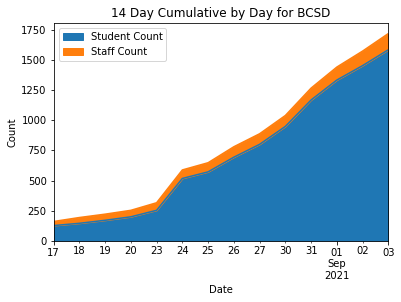

In [8]:
district = cleaned_df[cleaned_df.School=='Berkeley County School District']

print_recent_daily_difference(district)
    
bcsd_ax = district.plot("Date",["Student Count", "Staff Count"], kind='area', ylabel='Count', title="14 Day Cumulative by Day for BCSD")
bcsd_ax.plot()

### Mount Holly Elementary

On 2021-09-03 Student Count: 48. Staff Count: 6
On 2021-09-02 Student Count: 41. Staff Count: 6
Difference between 2021-09-03 and 2021-09-02. Student Count: 7. Staff Count: 0


[]

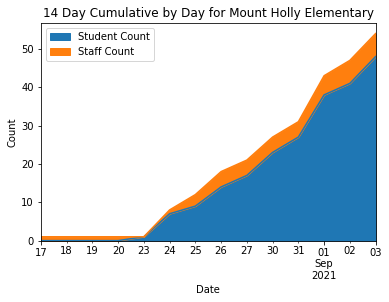

In [9]:
district = cleaned_df[cleaned_df.School=='Mount Holly Elementary']
print_recent_daily_difference(district)
mhe_ax = district.plot("Date",["Student Count", "Staff Count"], kind='area', ylabel='Count', title="14 Day Cumulative by Day for Mount Holly Elementary")
mhe_ax.plot()

### Bonner Elementary

On 2021-09-03 Student Count: 38. Staff Count: 7
On 2021-09-02 Student Count: 38. Staff Count: 7
Difference between 2021-09-03 and 2021-09-02. Student Count: 0. Staff Count: 0


[]

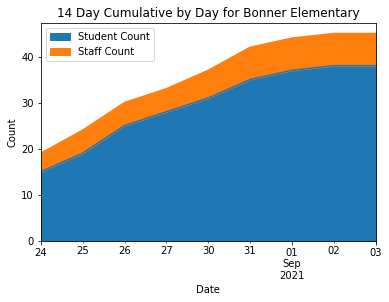

In [10]:
district = cleaned_df[cleaned_df.School=='Bonner Elementary']
print_recent_daily_difference(district)
bonn_ax = district.plot("Date",["Student Count", "Staff Count"], kind='area', ylabel='Count', title="14 Day Cumulative by Day for Bonner Elementary")
bonn_ax.plot()